In [1]:
import gensim
import logging
import os

from sklearn.decomposition import PCA
from matplotlib import pyplot

from nosql_db_connectie import divided_sentense_vacature_list, vacature_description

logging.basicConfig(format="%(asctime)s : %(levelname)s : %(message)s, level=logging.INFO")

Database(MongoClient(host=['employmentinsights-shard-00-01-edrz0.gcp.mongodb.net:27017', 'employmentinsights-shard-00-02-edrz0.gcp.mongodb.net:27017', 'employmentinsights-shard-00-00-edrz0.gcp.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='EmploymentInsights-shard-0', ssl=True), 'EmploymentInsights')


In [2]:
model = gensim.models.Word2Vec(divided_sentense_vacature_list, size=100, window=5, min_count=5, workers=3, iter=10)

In [3]:
w1 = ["frontend"]
model.wv.most_similar(positive=w1, topn=10)


[('carolina', 0.9979807138442993),
 ('positions', 0.9979805946350098),
 ('architect', 0.9978876113891602),
 ('devops', 0.997715950012207),
 ('jde', 0.9972678422927856),
 ('potential', 0.9971846342086792),
 ('north', 0.9971813559532166),
 ('overview', 0.9971597790718079),
 ('dc', 0.997145414352417),
 ('sdet', 0.9970927834510803)]

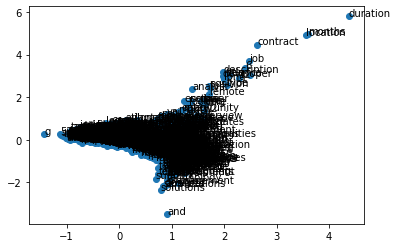

In [12]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()